In [1]:
from tcrnet import process, visualize

In [2]:
# path to your TCR data
tcr_filepath = "filtered_contig_annotations.csv"

In [3]:
# load TCR data and standardize the format
tcr_df = process.standardize_tcr_data(tcr_filepath=tcr_filepath, technology_platform='10X')

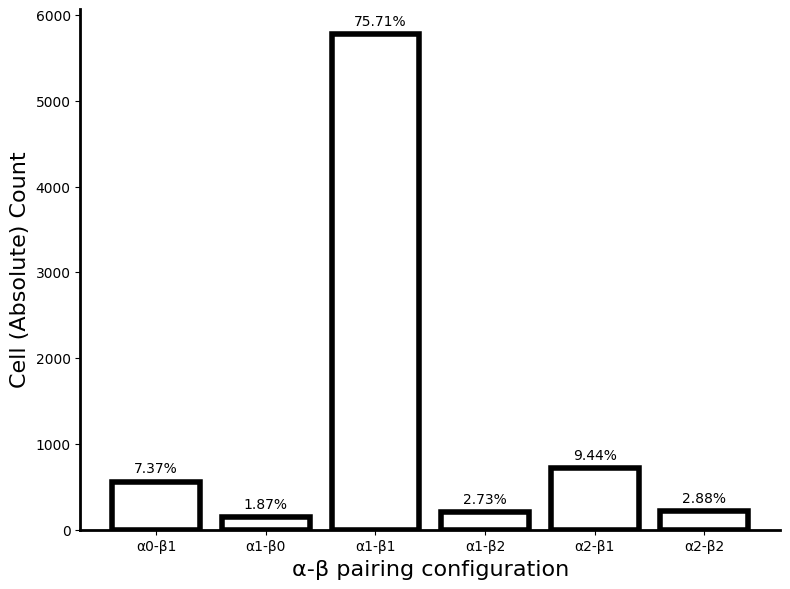

In [4]:
# generate QC plot showing the different alpha-beta pairing configurations in the data
visualize.chain_pairing_configurations(tcr_df=tcr_df)

In [5]:
# preprocess TCR data (chain pairing, QC, and clonotype definition)
ptcr_df = process.preprocess_tcr_data(tcr_df=tcr_df)

# records before QC: (15925, 32)
# records after QC 1 - Missing CDR sequences: (15925, 32)
# records after alpha-beta Pairing: (9220, 63)
# records after QC2 - Missing Chain Pairings: (7138, 64)


In [7]:
# compute clonotype abundances (absolute counts and relative frequencies)
qtcr_df = process.compute_clonotype_abundances(processed_tcr_df=ptcr_df)

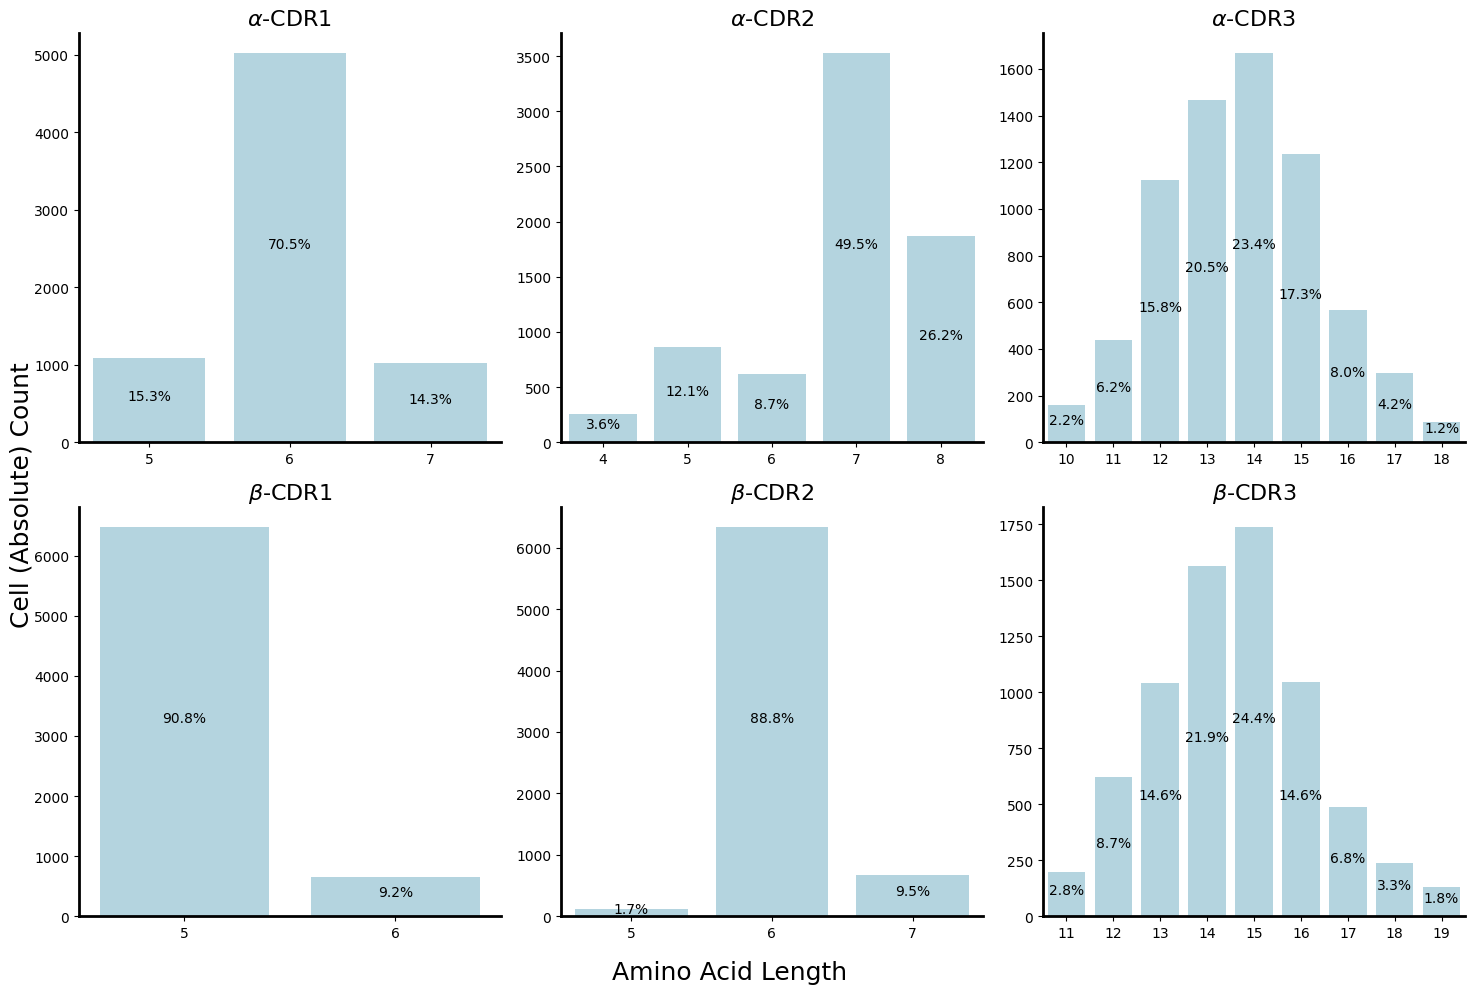

In [8]:
# generate panel of bar plots showing sequence length distribution across complementarity determining regions
visualize.sequence_length_distributions(tcr_df=qtcr_df)

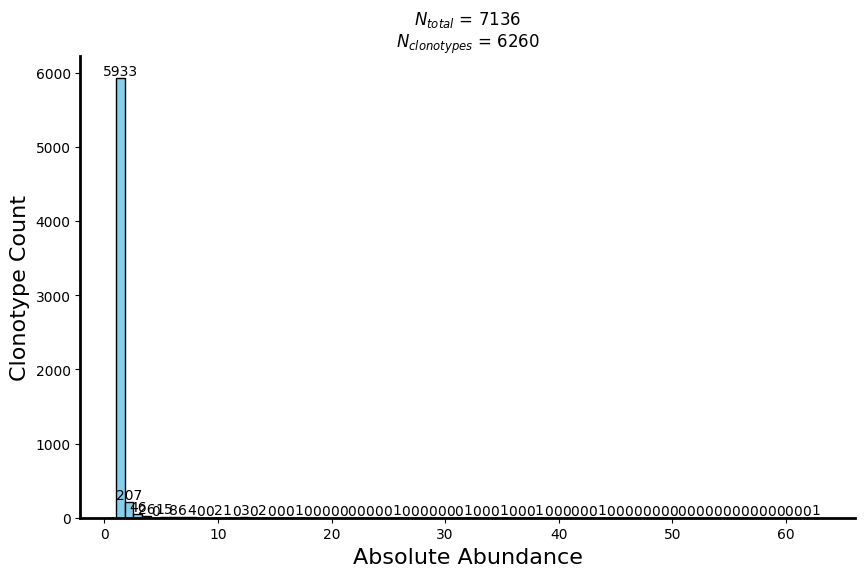

In [9]:
# generate histogram of clonotype abundances (most will likely have count = 1)
visualize.clonotype_abundances(tcr_df=qtcr_df)

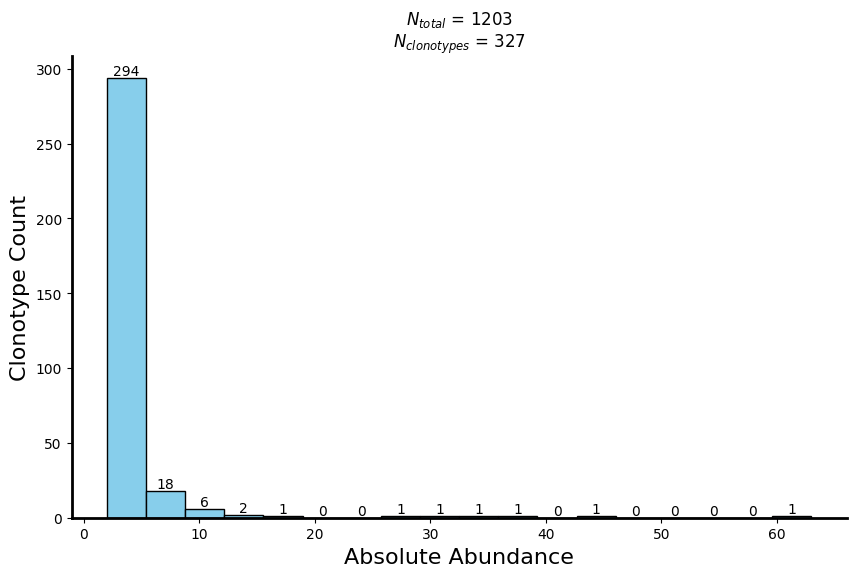

In [10]:
# it is usually more helpful to look at clonotype abundances for clonotypes with counts > 1
visualize.clonotype_abundances(tcr_df=qtcr_df.loc[qtcr_df['num_records']>1])

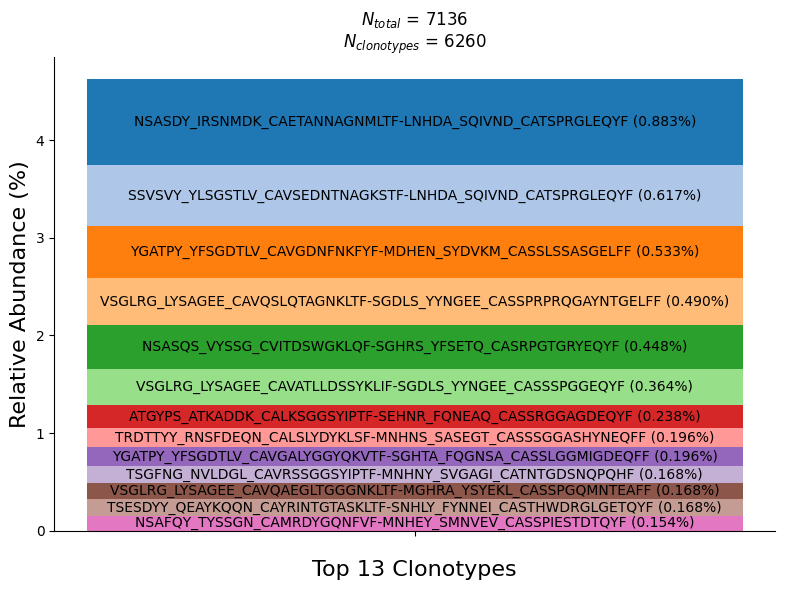

In [11]:
# visualize the top clonotypes by relative abundance
visualize.top_n_clonotypes(tcr_df=qtcr_df, top_n=13)